In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=linear.splcds - 118.999[mbs]
(1) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=uniformprior.splcds - 128.792[mbs]
(2) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds - 6.286[mbs]
(3) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=curvefit.splcds - 125.594[mbs]
(4) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=bspline.splcds - 118.925[mbs]
(5) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=mcmc.splcds - 125.451[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

method = 'curvefit'
filedir = f'../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method={method}.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=curvefit.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[outliers - samples 10]
(*) obs_samples: 541 - min_len: 14 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 1.0[days]
(g) obs_samples: 260 - min_len: 6 - max_dur: 408.0[days] - dur(p50): 133.7[days] - cadence(p50): 3.0[days]
(r) obs_samples: 281 - min_len: 8 - max_dur: 376.0[days] - dur(p50): 128.7[days] - cadence(p50): 3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 44]
(*) obs_samples: 990 - min_len: 7 - max_dur: 298.1[days] - dur(p50): 40.0[days] - cadence(p50): 1.0[days]
(g) obs_samples: 40

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


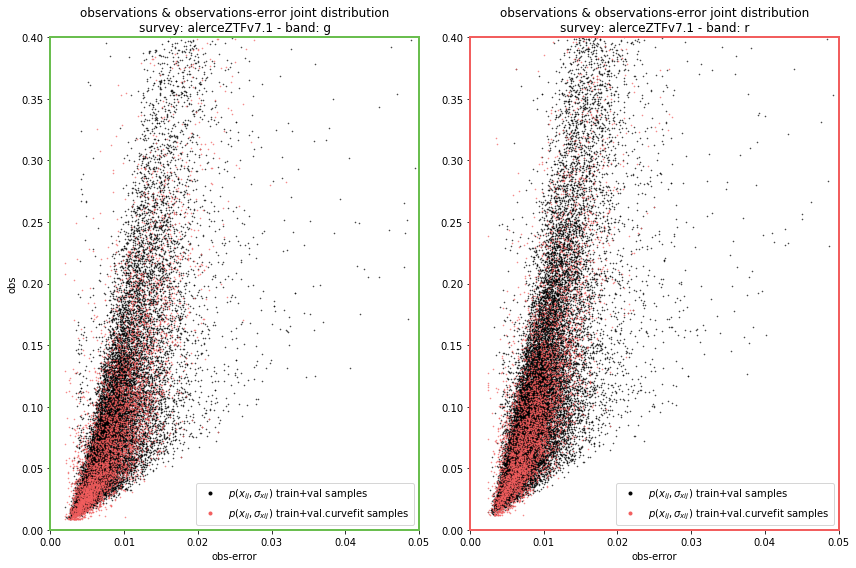

In [4]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.scatters import plot_obs_obse_scatter

plot_ndict = {
    f'train+val':None,
    f'train+val.{method}':5e3,
}
plot_obs_obse_scatter(lcdataset, list(plot_ndict.keys()), plot_ndict)

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from lcfats.map2d import get_fitted_maps2d
import matplotlib.pyplot as plt
from lcfats.plots.projs2d import plot_projections
from flamingchoripan.progress_bars import ProgressBar
from flamingchoripan.cuteplots.utils import save_fig
from flamingchoripan.strings import get_string_from_dict
from flamingchoripan.datascience.grid_search import GDIter, GridSeacher

grid_params = {
    'min_dist':0.1,
    'n_neighbors':GDIter(*np.linspace(10, 100, 8).astype(np.int)),
}
gs = GridSeacher(grid_params)
bar = ProgressBar(len(gs))
for params in gs:
    bar(str(params))
    lcset_name = f'train+val.{method}'
    load_rootdir = f'../save/{survey}/{cfilename}'
    map_kwargs = {
        'min_dist':params['min_dist'],
        'n_neighbors':params['n_neighbors'],
    }
    maps2d_dict = get_fitted_maps2d(lcdataset, lcset_name, load_rootdir, **map_kwargs)
    class_names = lcdataset['raw'].class_names
    for c in [None]+class_names:
        fig = plot_projections(maps2d_dict, c)
        if c is None:
            save_filedir = f'../save/{survey}/{cfilename}/maps/{get_string_from_dict(params)}.png'
        else:
            save_filedir = f'../save/{survey}/{cfilename}/maps/{get_string_from_dict(params)}/{c}.png'
        save_fig(fig, save_filedir, verbose=0)
        
bar.done()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|          | 0/8 [00:00, ?it/s, {'min_dist': 0.1, 'n_neighbors': 10}]